In [3]:
# Copyright 2020 Alex Khan
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""
Things to do:
 - Please name this file <demo_name>.py
 - Fill in [yyyy] and [name of copyright owner] in the copyright (top line)
 - Add demo code below
 - Format code so that it conforms with PEP 8
"""

import numpy as np
from numpy.random import rand

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from minorminer import find_embedding
import networkx as nx
import dwave.inspector



def Build_Q(dim):
    Q =  2*rand(dim,dim) - 1
    Q = (Q+Q.T)/2
    for k in range(dim):
        Q[k,k] = np.abs(Q[k,k])
    return(Q)


def Run_Dwave(Q):

    linear={('a'+str(k), 'a'+str(k)):Q[k][k] for k in range(dim)}

    quadratic={('a'+str(i+1), 'a'+str(j)):Q[i+1][j] for i in range(dim-1) for j in range(dim-1) if j<i+1}

    QDwave = dict(linear)
    QDwave.update(quadratic)

    print(QDwave)

    chainstrength = 10
    numruns = 100

    #clique = nx.complete_graph(7).edges()
    #target_graph = nx.random_regular_graph(d=4, n=30).edges()
    #embedding = find_embedding(clique, target_graph)
    #print(embedding)

    sampler = EmbeddingComposite(DWaveSampler())


    response = sampler.sample_qubo(QDwave, chain_strength=chainstrength, num_reads=numruns)
    print(response)
    #dwave.inspector.show(QDwave,response)
    


Initial conditions at t=0


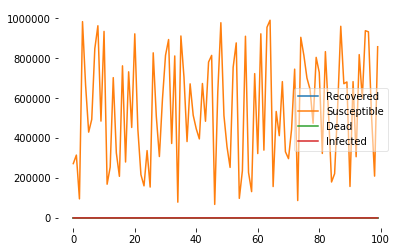

This plot shows a few instances of infected over time


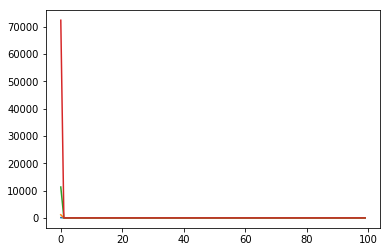

Results at the end of the run per location x


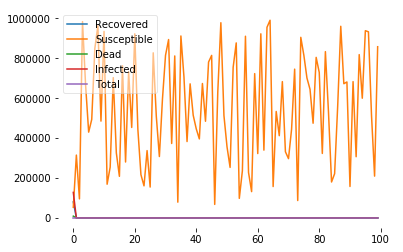

This plot has distance on the horizontal axis
Time: 30.000000000000156
Total Population:  54631166.16412995
Total Susceptible:      54413538.8214992
Total Infected:    128319.28884387019
Total Recovered:   80377.24840819201
Total Deaths:      8930.805378688
Total population results over time. Sum over all x


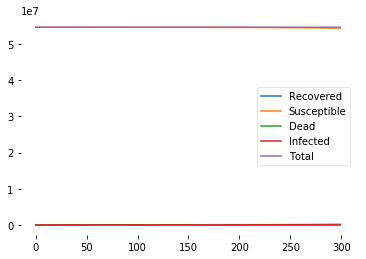

This plot has time on the horizontal axis


In [107]:
# SIR model showing progression of disease through a population 
# to be modeled on an annealing quantum computer

#
#    @2020 Alex Khan. All rights reserved
#    
#    This model is not indented to accurately predict or simulate real results
#    the goal is to create a simplifed version that can then be modeled on
#    an annealing quantum computer through a QUBO

#    This code simulates the movement of the disease over a distance x[0] to x[end]

#    Acknowledgements:
#    The original formula and code was taken from 
#    https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
#    The SIR model differential equations:
#    def deriv(y, t, N, beta, gamma):
#    S, I, R = y
#    dSdt = -beta * S * I / N
#    dIdt = beta * S * I / N - gamma * I
#    dRdt = gamma * I
#    return dSdt, dIdt, dRdt
#    equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)

#    More information on the formula and code is described 
#    by David Smith and Lang Moore
#    and can be found at:
#    https://www.maa.org/book/export/html/115606

#    An interesting simulation and models can be found at:    
#    https://gabgoh.github.io/COVID/index.html
#    https://python.quantecon.org/sir_model.html

## This version uses a) 1/N as a multiplier. 
#                    b) S[x] instead of S[x+/-1] in the transfer_rate terms. 
#                       This is because the change in infection in the transfer depends on the
#                       number infected at [x+/-1], but on those susceptible at x


import numpy as np
import matplotlib.pyplot as plt
import random

#### c is each instance of a city in this version
#### ctot is the total number of cities
ctot=100
c = [0] * (ctot)



#x[0]=1.0
#c=.7


#### Change the time scale
tend=30
dt=0.1
t=0.0

# Plot parameters
nPlots=5
printwhen=tend/dt/nPlots
printnow=0

#
# Build Initial conditions
#

# Number of people per location x
Nper0 = 1000000

# Total population, N.
# If not using random population
# Initialize Population per x

# a) If using the same value for all
#N = [Nper0] * (xend)

# b) If using random population
N = [random.randint(50000, Nper0) for x in range(0,ctot)]

    
# c) If using pattern population
#for kk in range (0,40):
#    N[kk]=20
#for kk in range (41,60):
#    N[kk]=100
#for kk in range (61, 100):
#    N[kk]=100

# Initial population check print
#for ii in range (0,end):
#    print(ii,N[ii])


# Initialize I
I = [0.0] * (ctot)

# Where are the infected at t=0
I[0] = 10

# Initial population check print
#for ii in range (0,end):
#    print(ii,I[ii])

# initialize S
S = [0.0]*(ctot)


# Now build total Susceptible per x
for kk in range (0,ctot):
    S[kk]=N[kk]-I[kk]

# Initial Susceptible check print
#for ii in range (0,end):
#    print(ii,S[ii])

    
#S=N <- this appears to link memory locations
# Everyone else, S0, is susceptible to infection initially.
#S0 = N - I0 - R0

# Where does the infection start
## comment if using random population
#S = [Nper0-Ninf0] * (end)

R = [0.0] * (ctot)
D = [0.0] * (ctot)
T = [0.0] * (ctot)

Rt=[]
St=[]
Dt=[]
It=[]
Tt=[]
Sp=0

  
  #
 ###
##### Make updates to rates here
 ###
  #
    
# Contact rate, beta (in 1/days).
beta = 0.5
# good range for beta 0.3-0.7
# smaller beta will delay spread, larger beta spreads quickly
#mean recovery rate, gamma (in 1/days)
gamma = 0.09
#mean death rate, gamma (in 1/days)
delta=0.01


# Contact rate, beta (in 1/days).
#beta = 0.7
#mean recovery rate, gamma (in 1/days)
#gamma = 0.05
#mean death rate, gamma (in 1/days)
#delta=0.03


# Initialize Transfer rate and assign value
transfer_rate=.0000001
#transfer_rate=0.001 to 0.01
#transfer_rate of 0.00001 or less eg. 0.0000001 shows multiple peaks
#smaller transfer rates show that once transfer occurs, disease spreads fast locally

# a) for a fixed transfer rate on all links
#TransRate = np.ones(shape=(xend,xend))
#TransRate =TransRate*transfer_rate

#TransRate = np.zeros(shape=(xend,xend))
# b) for random transfer rate
TransRate = np.ones(shape=(ctot,ctot))
for ii in range (0,ctot):
    for jj in range (0,ctot):
        TransRate[ii][jj]=random.randint(5,10)*transfer_rate/10
#print(TransRate)


#
# Partial Differenetial Equations
#

def fdSdt(S,I,N):
    #if N==0:
    #    return(0)
    #return(-beta * S * I)
    Sus=-beta * S * I/N
    
    return(Sus)
    

def fdSdt_tr(Tr, S,I,N):
    #if N==0:
    #    return(0)
    # Note use S[x] but I[x+/-1]
    #return(-transfer_rate * S * I)
    return(-Tr * S * I/N)

def fdIdt(S,I,N):
    #print('inside fdIdt',N)
    Sus=beta * S * I/N
    #    return(0)
    #return(beta * S * I  - gamma * I- delta * I)
    return(Sus - gamma * I- delta * I)

def fdIdt_tr(Tr, S,I,N):
    #if N==0:
    #    return(0)
    # Note use S[x] but I[x+/-1]
    #return(transfer_rate * S * I )
    
    return(Tr * S * I/N )
    
# number recovered 
def fdRdt(I):
    return(gamma * I)
    
def fdDdt(I):
    return(delta*I)
    
# total count check
def fT(S, I, R, D):
    return(S+I+R+D)


    
# Plot initial values
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Initial conditions at t=0')
plt.show()
# End Plot


Tstart=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)

while t<tend:
    #print('======= At time=',t)
    # Run forward through the population
    for xi in range (0,ctot):   
        for xj in range (0,ctot):

                if xi==xj:
                # linear terms    
                    S[xi]=S[xi]+fdSdt(S[xi],I[xi],N[xi])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt(S[xi],I[xi],N[xi])*dt

                    R[xi]=R[xi]+fdRdt(I[xi])*dt

                    D[xi]=D[xi]+fdDdt(I[xi])*dt
                else:
                # quadratic terms
                    S[xi]=S[xi]+fdSdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt

                #print(xi, xj, S[xi], I[xi])
    Tt.append(np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D))
    St.append(np.sum(S))
    It.append(np.sum(I))
    Rt.append(np.sum(R))
    Dt.append(np.sum(D))


    if (printnow==printwhen):

        plt.plot(I)

        printnow=0
    printnow+=1
    t+=dt

print('This plot shows a few instances of infected over time')
plt.show()   
# Plot    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
ax.plot(T, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Results at the end of the run per location x')
plt.show()
print('This plot has distance on the horizontal axis')


print('Time:', t)
print('Total Population: ', np.sum(fT(S,I,R,D)))
print('Total Susceptible:     ', np.sum(S))
print('Total Infected:   ', np.sum(I))
print('Total Recovered:  ', np.sum(R))
print('Total Deaths:     ', np.sum(D))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(Rt, label='Recovered')
ax.plot(St, label='Susceptible')
ax.plot(Dt, label='Dead')
ax.plot(It, label='Infected')
ax.plot(Tt, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Total population results over time. Sum over all x')
plt.show()
print('This plot has time on the horizontal axis')
    


# A grid of time points (in days)
#t = np.linspace(0, 160, 160)
# Plot the data on three separate curves for S(t), I(t) and R(t)
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
#ax = fig.add_subplot(111, axisbelow=True)
#ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
#ax.set_xlabel('Time /days')
#ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
#plt.show()

In [ ]:
# Line below can be run as subsequent time intervals

Initial conditions at t=0


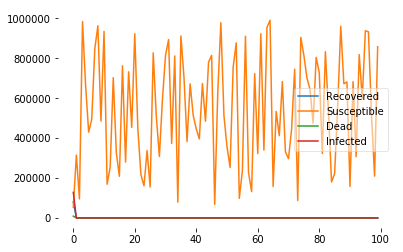

This plot shows a few instances of infected over time


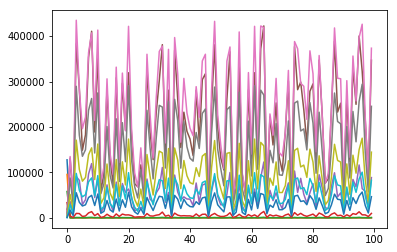

Results at the end of the run per location x


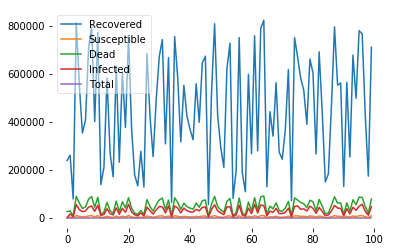

This plot has distance on the horizontal axis
Time: 90.099999999999
Total Population:  53855482.93502635
Total Susceptible:      530060.6481613187
Total Infected:    3044290.9955310747
Total Recovered:   45253018.162200555
Total Deaths:      5028113.129133395
Total population results over time. Sum over all x


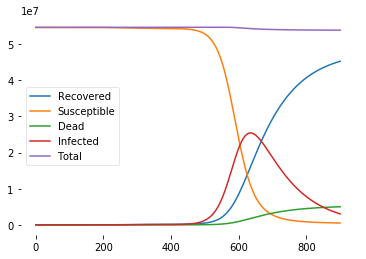

This plot has time on the horizontal axis


In [108]:
t=tend
tend=tend+60

# Plot initial values
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Initial conditions at t=0')
plt.show()
# End Plot


Tstart=np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D)

while t<tend:
    #print('======= At time=',t)
    # Run forward through the population
    for xi in range (0,ctot):   
        for xj in range (0,ctot):

                if xi==xj:
                # linear terms    
                    S[xi]=S[xi]+fdSdt(S[xi],I[xi],N[xi])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt(S[xi],I[xi],N[xi])*dt

                    R[xi]=R[xi]+fdRdt(I[xi])*dt

                    D[xi]=D[xi]+fdDdt(I[xi])*dt
                else:
                # quadratic terms
                    S[xi]=S[xi]+fdSdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt
                    if S[xi]<0:
                        S[xi]=0

                    I[xi]=I[xi]+fdIdt_tr(TransRate[xi][xj],S[xi],I[xj],N[xj])*dt

                #print(xi, xj, S[xi], I[xi])
    Tt.append(np.sum(S)+np.sum(I)+np.sum(R)+np.sum(D))
    St.append(np.sum(S))
    It.append(np.sum(I))
    Rt.append(np.sum(R))
    Dt.append(np.sum(D))


    if (printnow==printwhen):

        plt.plot(I)

        printnow=0
    printnow+=1
    t+=dt

print('This plot shows a few instances of infected over time')
plt.show()   
# Plot    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(R, label='Recovered')
ax.plot(S, label='Susceptible')
ax.plot(D, label='Dead')
ax.plot(I, label='Infected')
ax.plot(T, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Results at the end of the run per location x')
plt.show()
print('This plot has distance on the horizontal axis')


print('Time:', t)
print('Total Population: ', np.sum(fT(S,I,R,D)))
print('Total Susceptible:     ', np.sum(S))
print('Total Infected:   ', np.sum(I))
print('Total Recovered:  ', np.sum(R))
print('Total Deaths:     ', np.sum(D))


fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(Rt, label='Recovered')
ax.plot(St, label='Susceptible')
ax.plot(Dt, label='Dead')
ax.plot(It, label='Infected')
ax.plot(Tt, label='Total')
legend=ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print('Total population results over time. Sum over all x')
plt.show()
print('This plot has time on the horizontal axis')
    

In [4]:
# Terminal Commands
dim=50
Run_Dwave(Build_Q(dim))

{('a0', 'a0'): 0.9935592211857478, ('a1', 'a1'): 0.8243097144023215, ('a2', 'a2'): 0.8946045654852663, ('a3', 'a3'): 0.26996122828612457, ('a4', 'a4'): 0.35581124995885105, ('a5', 'a5'): 0.9117843838008193, ('a6', 'a6'): 0.2776214314254366, ('a7', 'a7'): 0.975027812425818, ('a8', 'a8'): 0.10584982540129761, ('a9', 'a9'): 0.9880635223069458, ('a10', 'a10'): 0.03433437341126533, ('a11', 'a11'): 0.06954035175641105, ('a12', 'a12'): 0.3991573839944653, ('a13', 'a13'): 0.7404129446745973, ('a14', 'a14'): 0.7650569883858673, ('a15', 'a15'): 0.5414885423598359, ('a16', 'a16'): 0.4494588109675457, ('a17', 'a17'): 0.31728474019192654, ('a18', 'a18'): 0.8461502183108611, ('a19', 'a19'): 0.6979528231829504, ('a20', 'a20'): 0.9180173960563072, ('a21', 'a21'): 0.703240550511329, ('a22', 'a22'): 0.06798483958720158, ('a23', 'a23'): 0.6422307393840603, ('a24', 'a24'): 0.13088379206020395, ('a25', 'a25'): 0.6582435734361867, ('a26', 'a26'): 0.10898082594870973, ('a27', 'a27'): 0.724308767593322, ('a28

   a0 a1 a10 a11 a12 a13 a14 a15 a16 a17 a18 a19 ... a9    energy num_oc. ...
0   1  0   1   0   0   0   0   1   0   1   1   0 ...  0 -10.305953       1 ...
1   0  1   1   0   1   1   1   1   1   1   1   0 ...  0 -9.163444       1 ...
81  1  1   1   0   1   1   1   1   1   0   1   0 ...  0 -9.074033       1 ...
2   0  0   1   0   1   1   1   1   1   1   1   1 ...  1 -7.045265       1 ...
98  0  1   0   1   1   1   0   1   1   0   1   0 ...  1 -6.773732       1 ...
3   0  0   1   1   1   1   0   1   1   0   1   0 ...  0  -6.69413       1 ...
4   0  1   1   1   1   1   0   1   1   0   1   1 ...  1 -6.581866       1 ...
5   0  0   1   0   0   1   1   0   1   1   0   0 ...  0  -6.40081       1 ...
6   0  1   1   0   1   1   1   1   1   1   1   0 ...  1 -6.216068       1 ...
7   0  0   1   1   1   1   1   1   0   0   1   0 ...  1 -5.895773       1 ...
8   0  1   1   1   1   1   0   1   1   1   1   0 ...  0 -5.850268       1 ...
83  0  0   1   1   1   0   1   1   0   0   1   0 ...  1 -5.6758